<h1>Training and Testing</h1>

<h3>Overfitting</h3>

<p>Building a model with all of our data and then looking on how well it performs on the same data artificially inflate our numbers since our model, in effect, got to see the answers to the quiz before we gave it the quiz, which can lead to what we call overfitting</p>

<strong>Overfitting is when we perform well on the data the model has already seen, but we don’t perform well on new data.</strong>

<p>We can visualize overfitting by the line drawn in the plot image below, where the line is too closely trying to get every single datapoint on the correct side of the line but it is missing the essence of the data.</p>

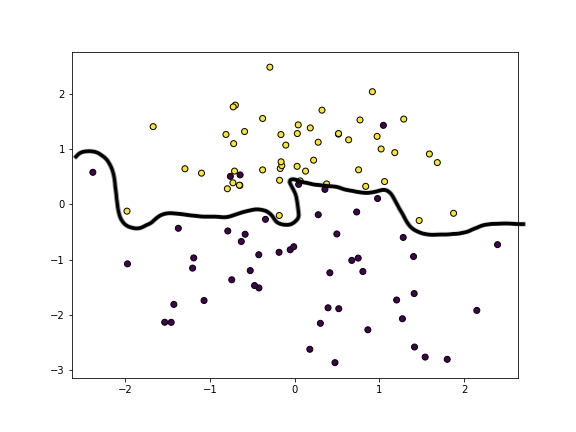

In [1]:
from IPython.display import Image, display
image_path = './images/overfitting.jpg'
display(Image(filename=image_path))

<p>In the graph you can see that we’ve done a pretty good job of getting the yellow dots on the top and the purple dots on the bottom, but it isn’t capturing what’s going on.</p>

<p>A single outlier point could really throw off the location of the line. While the model would get a great score on the data it’s already seen, it’s unlikely to perform well on new data.</p>

<strong>It is worth it to note that the more features we have in our dataset, the more prone we’ll be to overfitting.</strong>

<h3>Training Set and Test Set</h3>

<p>In action, our model will be making predictions on data we don’t know the answer to, so we’d like to evaluate how well our model does on new data, not just the data it’s already seen.</p>

<p>To simulate making predictions on new unseen data, we can break our dataset into 2 sets:</p>
<ul>
    <li>Training Set: Which is used for building the models.</li>
    <li>Test Set: Which is used for evaluating the models.</li>
</ul>

<p>We split our data before building the model, thus the model has no knowledge of the test set and we’ll be giving it a fair assessment</p>

<p>An example is if our dataset has 200 datapoints in it, breaking it into a training set and test set might look as follows.</p>

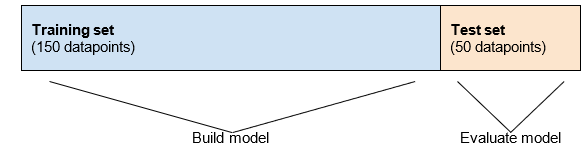

In [2]:
image_path = './images/training_and_testing_sets.jpg'
display(Image(filename=image_path))

<strong>A standard breakdown is to put 70-80% of our data in the training set and 20-30% in the test set. Using less data in the training set means that our model won’t have as much data to learn from, so we want to give it as much as possible while still leaving enough for evaluation.</strong>

<h3>Training and Testing in Sklearn</h3>

<p>Scikit-learn has a function built in for splitting the data into a training set and a test set. This function is called <strong>train_test_split</strong></p>
<p>This function will randomly put each datapoint in either the training set or the test set. By default the training set is 75% of the data and the test set is the remaining 25% of the data.</p>

<p>The code below demonstrate how to split our data into a training and a test dataset using scikit-learn</p>

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("Shape of whole dataset:", X.shape, y.shape)
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of whole dataset: (887, 6) (887,)
Shape of training set: (665, 6) (665,)
Shape of test set: (222, 6) (222,)


<p>We can see the following:</p>
<ul>
    <li>Of the 887 datapoints in our dataset, 665 of them are in our training set and 222 are in the test set.</li>
    <li>Every datapoint from our dataset is used exactly once, either in the training set or the test set.</li>
    <li>We have 6 features in our dataset, so we still have 6 features in both our training set and test set.</li>
</ul>

<p>We can change the size of our training set by using the <strong>train_size</strong> parameter. E.g. train_test_split(X, y, <strong>train_size=0.6</strong>) would put <strong>60% of the data</strong> in the training set and 40% in the test set.</p>

<h3>Building a Scikit-learn Model Using a Training Set</h3>

<p>Now we can build the model using the training set, and then evaluate it by calculating the evaluation metrics on the test set.</p>

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

# building the model
model = LogisticRegression(max_iter=2500)
model.fit(X_train, y_train)

# evaluating the model
# print("accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.8018018018018018
precision: 0.7951807228915663
recall: 0.7096774193548387
f1 score: 0.75


<strong>Note that our accuracy, precision, recall and F1 score values are actually very similar to the values when we used the entire dataset. This is a sign that our model is not overfit!</strong>

<p>Also note if you run the code, you’ll notice that you get different scores each time. This is because the train test split is done randomly, and depending which points land in the training set and test, the scores will be different. Although you can also use the <strong>random_state</strong> parameter and give it a arbitrary number to get the same random split each time you run the code above, or you can use <strong>cross validation</strong> for more accurate means of measuring these scores.</p>

<h3>Using a Random State</h3>

<p>Each time we run the previous code, we will get different results. This is a result of randomness, and we need it to be random for it to be effective, but this can sometimes make it difficult to test the code.</p>

<p>To get the same split every time, we can use the <strong>random_state</strong> attribute. We choose an arbitrary number to give it, and then every time we run the code, we will get the same split as demonstrated below.</p>

<p>The random state is also called a seed.</p>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
print('X_train:', X_train)
print('X_test:', X_test)

# evaluating the model
# print("accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

X_train: [[3 True 28.0 0 0 7.7958]
 [3 False 22.0 0 0 10.5167]
 [1 True 24.0 0 0 79.2]
 ...
 [3 False 26.0 1 0 15.5]
 [1 True 42.0 1 0 52.0]
 [3 False 0.75 2 1 19.2583]]
X_test: [[3 False 39.0 1 5 31.275]
 [2 True 34.0 0 0 13.0]
 [1 True 37.0 0 1 29.7]
 ...
 [1 True 28.0 0 0 35.5]
 [1 False 54.0 1 0 78.2667]
 [2 True 21.0 1 0 11.5]]
accuracy: 0.7792792792792793
precision: 0.7901234567901234
recall: 0.6666666666666666
f1 score: 0.7231638418079096
